In [16]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [7]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_range]

C:\Users\Rdhak\AppData\Local\Temp\ipykernel_1036\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

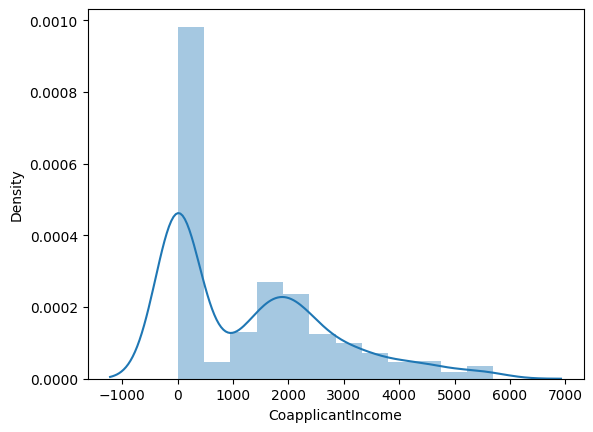

In [8]:
sns.distplot(dataset["CoapplicantIncome"])

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(dataset[["CoapplicantIncome"]])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [14]:
dataset["transformed_coIncome"]=ft.transform(dataset[["CoapplicantIncome"]])

In [15]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,transformed_coIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


C:\Users\Rdhak\AppData\Local\Temp\ipykernel_1036\2653780740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Rdhak\AppData\Local\Temp\ipykernel_1036\2653780740.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["transformed_coIncome"])


<Axes: xlabel='transformed_coIncome', ylabel='Density'>

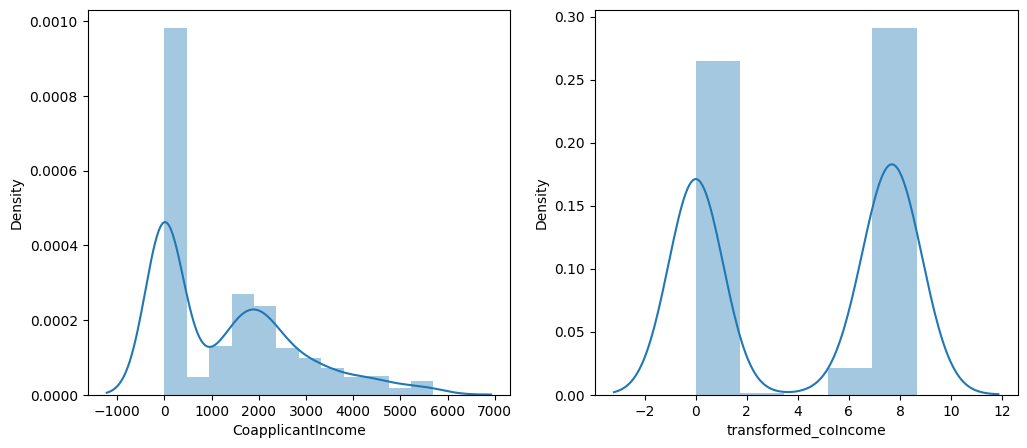

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
sns.distplot(dataset["transformed_coIncome"])

In [22]:
ft1=FunctionTransformer(func=lambda x:x**2)
dataset["transformed_coIncome_tf1"]=ft.fit_transform(dataset[["CoapplicantIncome"]])

C:\Users\Rdhak\AppData\Local\Temp\ipykernel_1036\410941847.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Rdhak\AppData\Local\Temp\ipykernel_1036\410941847.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["transformed_coIncome_tf1"])


<Axes: xlabel='transformed_coIncome_tf1', ylabel='Density'>

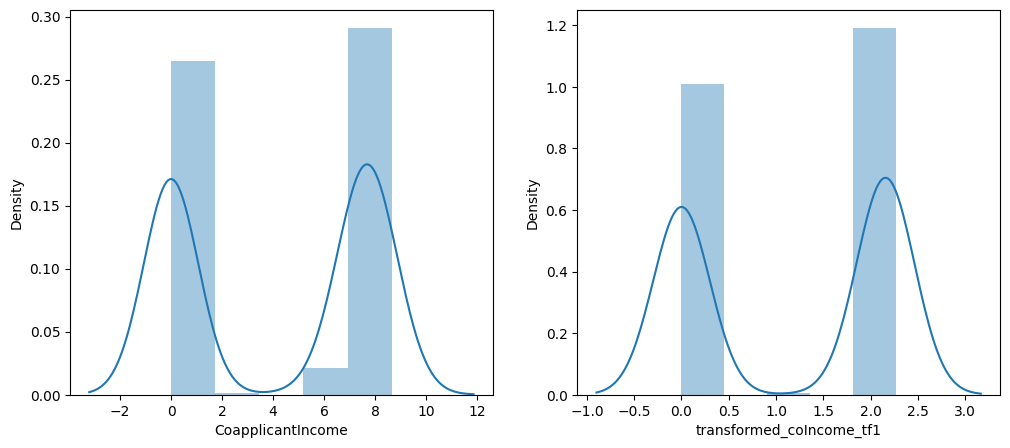

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
sns.distplot(dataset["transformed_coIncome_tf1"])

In [24]:
dataset.head(3)

,CoapplicantIncome,transformed_coIncome_tf1
0,0.000000,0.000000
1,7.319202,2.118566
2,0.000000,0.000000
